In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
print("Shape:", df.shape)               # (150, 5)
print("\nColumns:", df.columns)         # Index of column names
print("\nInfo:")
df.info()
df.head()


Shape: (150, 6)

Columns: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


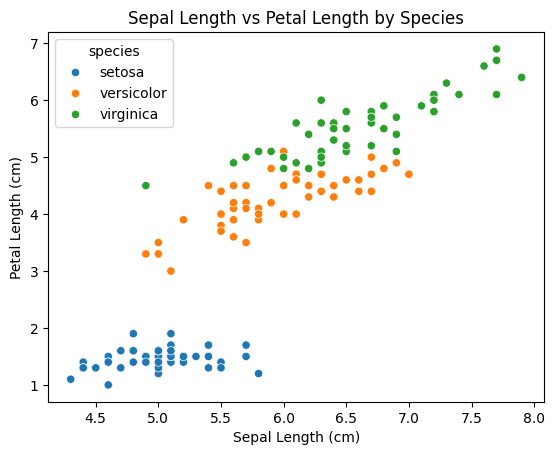

In [ ]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species')
plt.title('Sepal Length vs Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

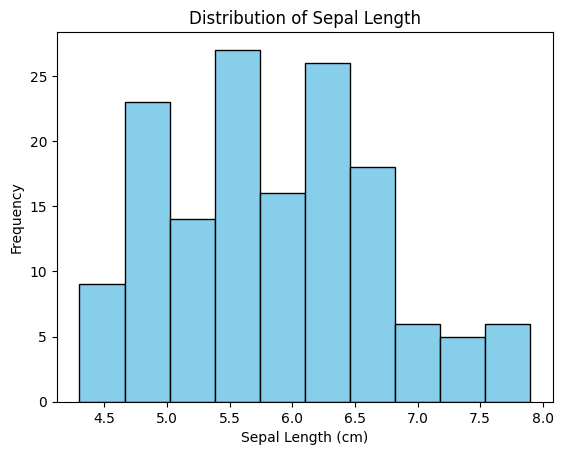

In [ ]:
# Histogram for sepal_length
plt.hist(iris['sepal_length'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


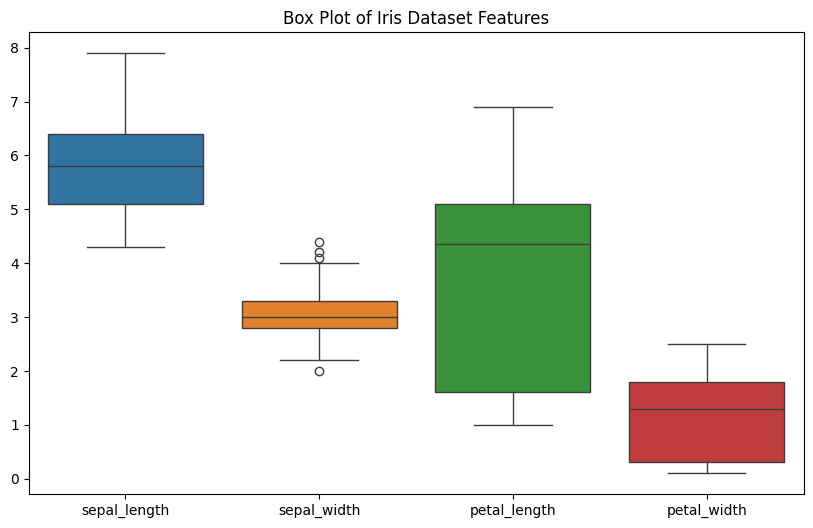

In [ ]:
# Box plot for all numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris)
plt.title('Box Plot of Iris Dataset Features')
plt.show()


TASK **2**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:

df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')


In [ ]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing categorical with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing numerical with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)


Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<ipython-input-14-bce51cf184fc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-14-bce51cf184fc>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

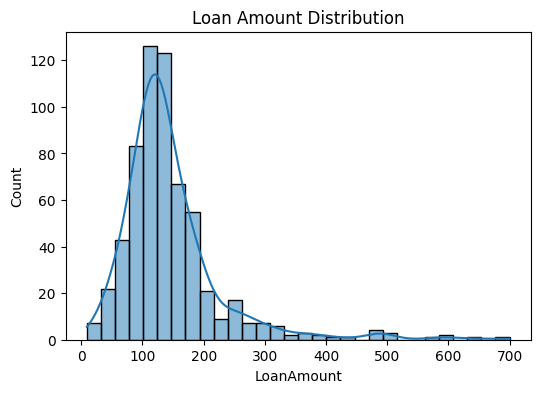

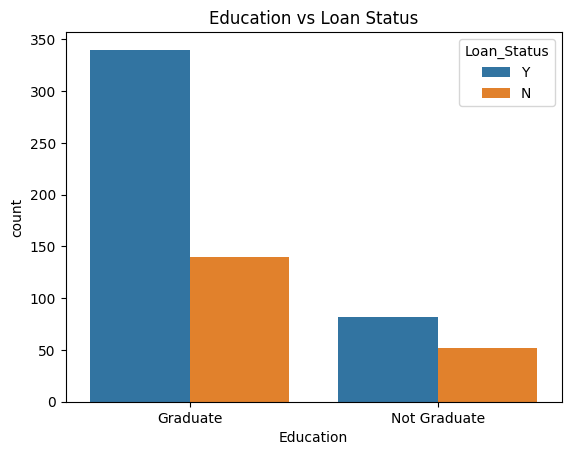

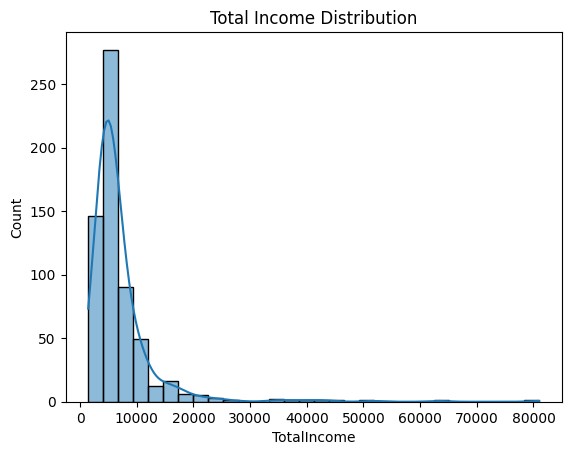

In [ ]:
# LoanAmount distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.show()

# Education vs Loan Status
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title('Education vs Loan Status')
plt.show()

# Income (combine Applicant and Coapplicant)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.histplot(df['TotalIncome'], bins=30, kde=True)
plt.title('Total Income Distribution')
plt.show()


In [ ]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
# Define features and target
X = df[['Credit_History', 'Education', 'LoanAmount', 'TotalIncome']]
y = df['Loan_Status']  # 1 = Approved, 0 = Not Approved

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


Accuracy: 0.7886178861788617


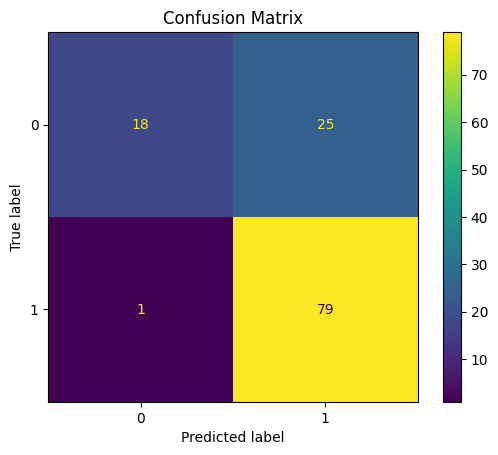

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


TASK 3

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Load the dataset (adjust path as needed)
df = pd.read_csv('Churn_Modelling.csv')


In [ ]:
# Drop irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
# Label Encoding for 'Gender'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# One-Hot Encoding for 'Geography'
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [ ]:
X = df.drop('Exited', axis=1)   # Exited = target (1 = churned, 0 = stayed)
y = df['Exited']


In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


Accuracy: 0.8665


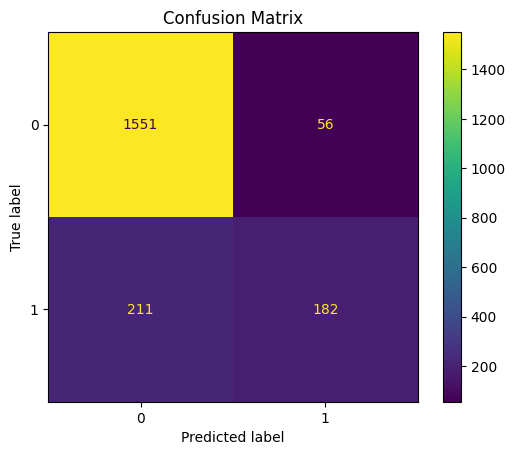

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


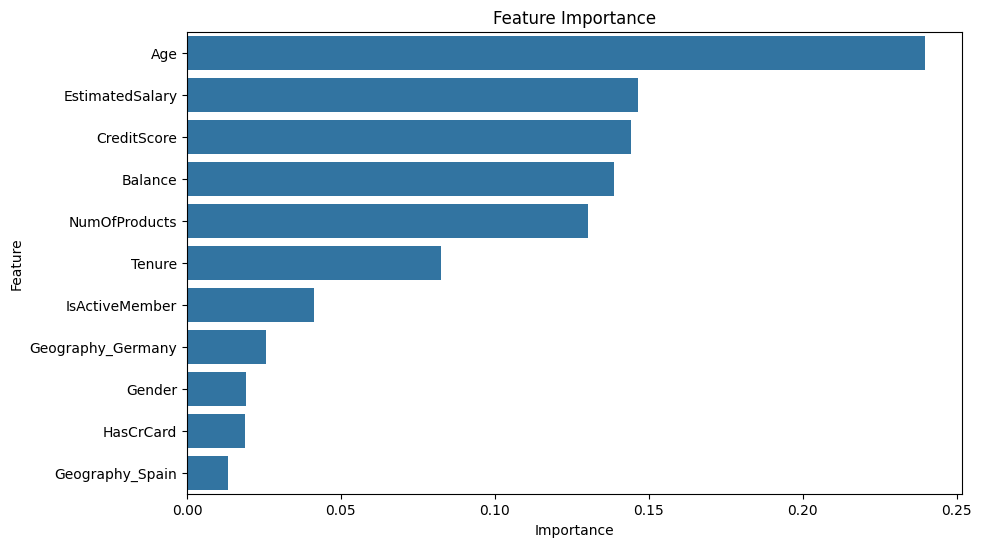

In [ ]:
# Plot feature importance
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title('Feature Importance')
plt.show()


**TASK 4**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




In [6]:
df = pd.read_csv("/content/Insurance claims data.csv", on_bad_lines='skip')
print(df.head())
print(df.info())
print(df['claim_status'].value_counts())  # Check class balance


/tmp/ipython-input-6-4220312626.py:1: DtypeWarning: Columns (12,19,20,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Insurance claims data.csv", on_bad_lines='skip')


   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks is_central_locking is_power_steeri

In [17]:
df.dropna(inplace=True)


In [18]:
# Encode all object-type (categorical) columns
cat_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [19]:
X = df.drop('claim_status', axis=1)
y = df['claim_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9351526793402662
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     14118
         1.0       0.00      0.00      0.00       979

    accuracy                           0.94     15097
   macro avg       0.47      0.50      0.48     15097
weighted avg       0.87      0.94      0.90     15097

Confusion Matrix:
 [[14118     0]
 [  979     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


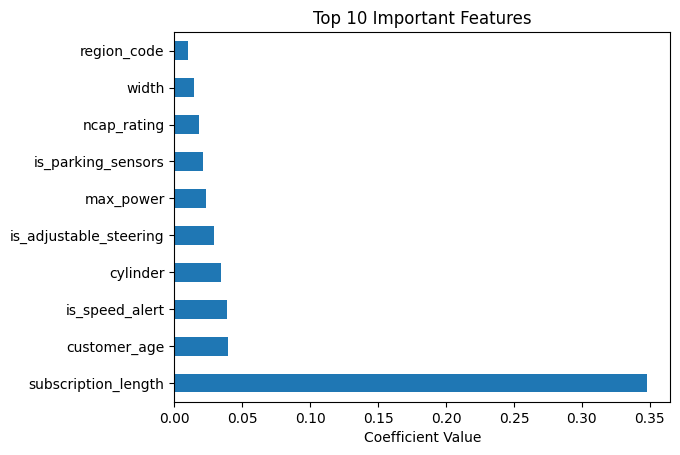

In [24]:
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Coefficient Value")
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv("/content/Bank_Personal_Loan.csv")  # Bank dataset uses semicolon separator
print(df.head())
print(df.info())


   ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 co

In [4]:
# Convert CCAvg to numeric — it's in string format like "1/60", "2/70"
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype(float)

# Drop ID and ZIP Code — not useful
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)


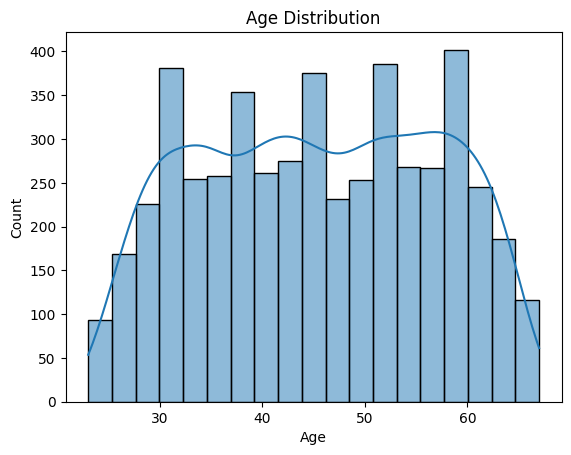

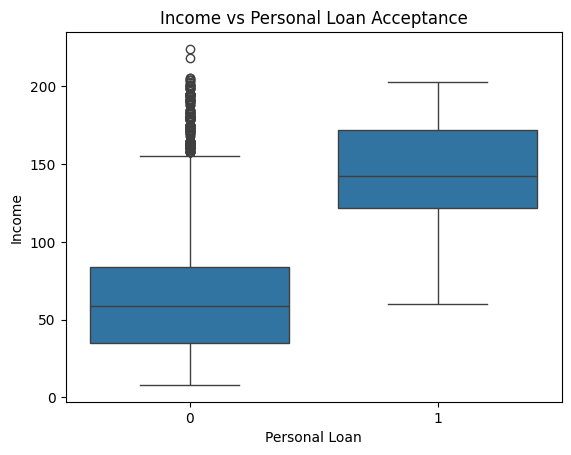

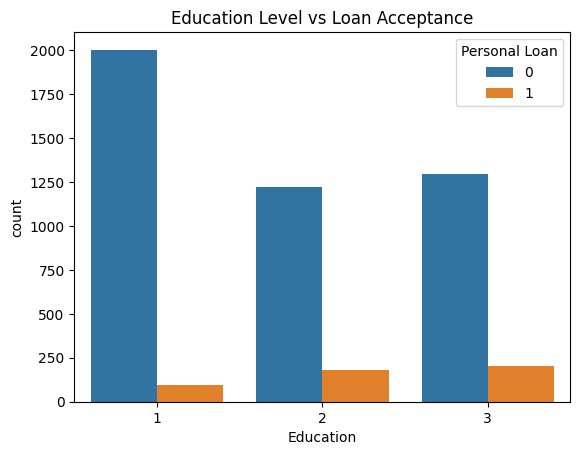

In [5]:
# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Income vs Loan Acceptance
sns.boxplot(x='Personal Loan', y='Income', data=df)
plt.title("Income vs Personal Loan Acceptance")
plt.show()

# Education level vs Loan
sns.countplot(x='Education', hue='Personal Loan', data=df)
plt.title("Education Level vs Loan Acceptance")
plt.show()


In [6]:
# Features & target
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))


Logistic Regression Accuracy: 0.955
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.86      0.69      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.95      0.95      0.95      1000



In [8]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))
print("Classification Report:\n", classification_report(y_test, tree_preds))


Decision Tree Accuracy: 0.984
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.93      0.91      0.92       105

    accuracy                           0.98      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000



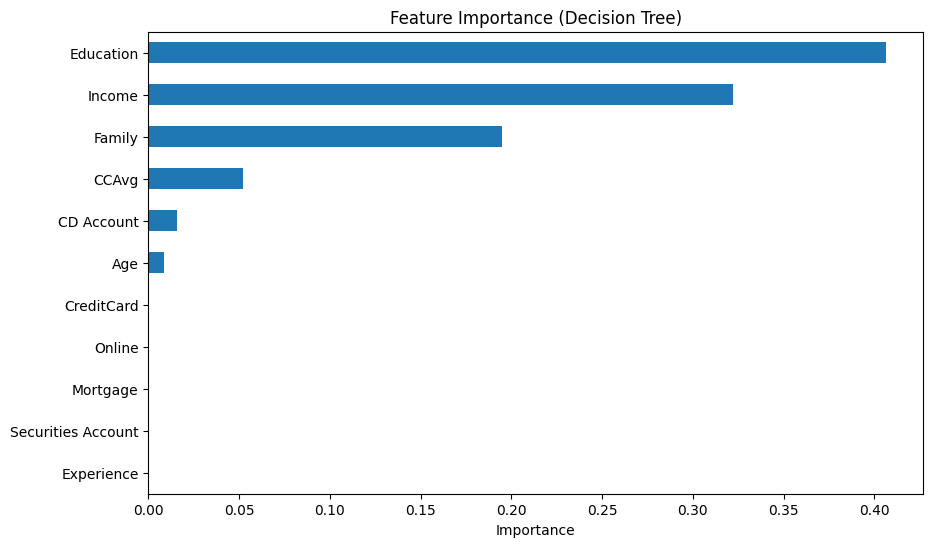

In [9]:
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.show()
